In [16]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [17]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [18]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [19]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [24]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
scaler = StandardScaler()

normalized_data = scaler.fit_transform(df_market_data)

In [25]:
# Create a DataFrame with the scaled data
df_market_data_scaled = pd.DataFrame(normalized_data, columns=df_market_data.columns, index=df_market_data.index)

# Set the coinid column as index

# Display sample data
df_market_data_scaled.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317
binancecoin,0.891871,1.327295,0.800214,-0.057148,0.778653,-0.188232,-0.225533
chainlink,0.011397,2.572251,1.101647,-0.490495,-0.931954,0.387759,-0.018284
cardano,0.102530,1.508001,0.648885,0.328959,-0.486349,0.065080,-0.155428
litecoin,0.077497,0.334297,0.858520,-0.012646,-0.366477,-0.486266,-0.292351


---

### Find the Best Value for k Using the Original Data.

In [26]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 11)) 

In [35]:
# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
for k in k_values:
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_scaled`
# 3. Append the model.inertia_ to the inertia list
# Create a list with the number of k-values from 1 to 11
    cluster = KMeans(n_clusters=k) # n_clusters means the number of clustrs groups that is going to train the model
    cluster.fit(df_market_data_scaled) #Train the model
    inertia.append(cluster.inertia_) 

C:\Users\Canj9\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Canj9\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Canj9\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Canj9\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The defa

In [38]:
# Create a dictionary with the data to plot the Elbow curve
# Create a DataFrame with the data to plot the Elbow curve
elbow_series = pd.Series(inertia, index=range(1,11))

<Axes: >

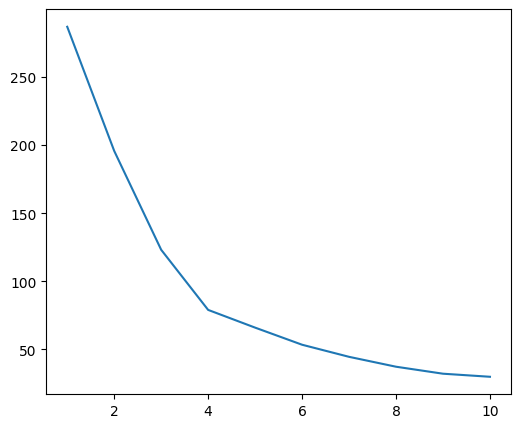

In [39]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
elbow_series.plot(figsize=(6,5))

#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** 4

---

### Cluster Cryptocurrencies with K-means Using the Original Data

In [11]:
# Initialize the K-Means model using the best value for k
kmeans = KMeans(n_clusters=4, random_state=1)

In [44]:
# Fit the K-Means model using the scaled data
cluster.fit(df_market_data_scaled)

C:\Users\Canj9\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=10)

In [47]:
# Predict the clusters to group the cryptocurrencies using the scaled data
cluster_labels= cluster.predict(df_market_data_scaled)

# Print the resulting array of cluster values.
print(cluster_labels)

[4 4 7 7 9 4 8 8 4 0 5 7 7 9 0 0 7 0 8 7 5 4 7 7 7 7 0 5 4 2 0 0 3 0 5 6 1
 5 0 7 5]


In [48]:
# Create a copy of the DataFrame
df_clustered = df_market_data_scaled.copy()

In [55]:
# Add a new column to the DataFrame with the predicted clusters
df_clustered['cluster'] = cluster_labels

# Display sample data
df_clustered.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,cluster
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,4
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,4
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,7
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,7
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,9


In [58]:
# Create a scatter plot using hvPlot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.

scatter_plot = df_clustered.hvplot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    by='cluster',
    hover_cols=df_market_data_scaled.index.name,
    width=800,
    height=500
)

# Display the scatter plot
scatter_plot


:NdOverlay   [cluster]
   :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)

---

### Optimize Clusters with Principal Component Analysis.

In [59]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)

In [60]:
# Use the PCA model with `fit_transform` to reduce to 
# three principal components.
pca_data = pca.fit_transform(df_market_data_scaled)
df_pca = pd.DataFrame(data=pca_data, columns=['PC1', 'PC2', 'PC3'], index=df_market_data_scaled.index)

# View the first five rows of the PCA DataFrame
print(df_pca.head())

                   PC1       PC2       PC3
coin_id                                   
bitcoin      -0.600667  0.842760  0.461595
ethereum     -0.458261  0.458466  0.952877
tether       -0.433070 -0.168126 -0.641752
ripple       -0.471835 -0.222660 -0.479053
bitcoin-cash -1.157800  2.041209  1.859715


In [63]:
# Retrieve the explained variance to determine how much information 
# can be attributed to each principal component.

explained_variance_ratio = pca.explained_variance_ratio_

for i, ratio in enumerate(explained_variance_ratio, start=1):
    print(f"Explained Variance Ratio for PC{i}: {ratio:.4f}")

sum(pca.explained_variance_ratio_)

Explained Variance Ratio for PC1: 0.3720
Explained Variance Ratio for PC2: 0.3470
Explained Variance Ratio for PC3: 0.1760


0.895031657030984

#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** 89.5 %


In [66]:
# Create a new DataFrame with the PCA data.

# Creating a DataFrame with the PCA data
df_pca = pd.DataFrame(data=pca_data, columns=['PC1', 'PC2', 'PC3'], index=df_market_data_scaled.index)

# Copy the crypto names from the original data
df_pca['coin_id'] = df_market_data_scaled.index

# Set the coinid column as index
df_pca.set_index('coin_id', inplace=True)

# Display sample data
df_pca.head()

,PC1,PC2,PC3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


---

### Find the Best Value for k Using the PCA Data

In [67]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 11))


In [68]:
# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_pca`
# 3. Append the model.inertia_ to the inertia list
for k in k_values:
    cluster = KMeans(n_clusters=k) # n_clusters means the number of clustrs groups that is going to train the model
    cluster.fit(df_pca) #Train the model
    inertia.append(cluster.inertia_) 

C:\Users\Canj9\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Canj9\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Canj9\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Canj9\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The defa

In [80]:
# Create a dictionary with the data to plot the Elbow curve
elbow_series_pca = {'k_values': k_values, 'inertia': inertia}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_series_pca)



<Axes: >

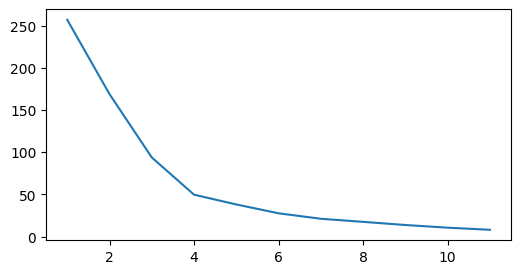

In [85]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
elbow_series_pca = pd.Series(inertia, index=k_values)
elbow_series_pca.plot(figsize=(6,3))


#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** 4


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** No

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [72]:
# Initialize the K-Means model using the best value for k
kmeans = KMeans(n_clusters=4, random_state=1)

In [73]:
# Fit the K-Means model using the PCA data
kmeans.fit(df_pca)

C:\Users\Canj9\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4, random_state=1)

In [75]:
# Predict the clusters to group the cryptocurrencies using the PCA data
cluster_pca = kmeans.predict(df_pca)
# Print the resulting array of cluster values.
print(cluster_pca)

[2 2 0 0 2 2 2 2 2 0 0 0 0 2 0 2 0 0 2 0 0 2 0 0 0 0 0 0 2 0 0 0 3 2 0 0 1
 0 0 0 0]


In [76]:
# Create a copy of the DataFrame with the PCA data
df_clustered_pca = df_pca.copy()

# Add a new column to the DataFrame with the predicted clusters
df_clustered_pca['predicted_cluster'] = cluster_pca

# Display sample data
df_clustered_pca.head()

,PC1,PC2,PC3,predicted_cluster
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,2
ethereum,-0.458261,0.458466,0.952877,2
tether,-0.433070,-0.168126,-0.641752,0
ripple,-0.471835,-0.222660,-0.479053,0
bitcoin-cash,-1.157800,2.041209,1.859715,2


In [97]:
# Create a scatter plot using hvPlot by setting 
# `x="PC1"` and `y="PC2"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.

scatter_plot_pca = df_clustered_pca.hvplot.scatter(
    x='PC1',
    y='PC2',
    by = 'predicted_cluster',
    hover_cols=df_clustered_pca.index.name,
    width=800,
    height=600
)

# Display the scatter plot
scatter_plot_pca

:NdOverlay   [predicted_cluster]
   :Scatter   [PC1]   (PC2,coin_id)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

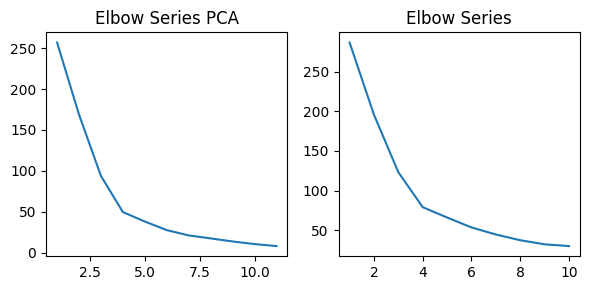

In [86]:
# Composite plot to contrast the Elbow curves
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot the Elbow Series PCAt on the first subplot
elbow_series_pca.plot(ax=ax1, figsize=(6, 3))
ax1.set_title("Elbow Series PCA")

# Plot the Elbow Series on the second subplot
elbow_series.plot(ax=ax2, figsize=(6, 3))
ax2.set_title("Elbow Series")

# Adjust layout
plt.tight_layout()

# Show the combined plot
plt.show()


In [106]:
# Composite plot to contrast the clusters
composite_plot = scatter_plot + scatter_plot_pca
composite_plot.cols(1)


C:\Users\Canj9\AppData\Roaming\Python\Python311\site-packages\holoviews\plotting\bokeh\plot.py:987: UserWarning: found multiple competing values for 'toolbar.active_drag' property; using the latest value
  layout_plot = gridplot(
C:\Users\Canj9\AppData\Roaming\Python\Python311\site-packages\holoviews\plotting\bokeh\plot.py:987: UserWarning: found multiple competing values for 'toolbar.active_scroll' property; using the latest value
  layout_plot = gridplot(


:Layout
   .NdOverlay.I  :NdOverlay   [cluster]
      :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)
   .NdOverlay.II :NdOverlay   [predicted_cluster]
      :Scatter   [PC1]   (PC2,coin_id)

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** Using fewer features, especially after dimensionality reduction like PCA, can lead to more interpretable and potentially improved clustering results